# EEG-03 Solutions

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

Today's demonstration will introduce time-frequency analysis of EEG data using `mne-python`. We will start by loading the epoched data from last session.

In [2]:
from mne import read_epochs

## Load data.
f = os.path.join('..','data','sub-01_task-audvis-epo.fif')
epochs = read_epochs(f, preload=True, verbose=False)

## Section 1: Time-Frequency Decomposition

In [3]:
from mne.time_frequency import tfr_morlet

## Define parameters.
freqs = np.arange(8, 40, 2)  # define frequencies of interest
decim = 6

evokeds = dict()
for k in epochs.event_id.keys():
    
    ## Perform time-frequency decomposition.
    tfr_evoked = tfr_morlet(epochs[k].average(), freqs, n_cycles=4., decim=decim,
                            average=False, return_itc=False, n_jobs=1)

    ## Perform baseline correction.
    tfr_evoked.apply_baseline(mode='logratio', baseline=(None, -0.1))
    
    ## Store.
    
    evokeds[k] = tfr_evoked.crop(tmin=-0.1)

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


## Section 2: Visualization

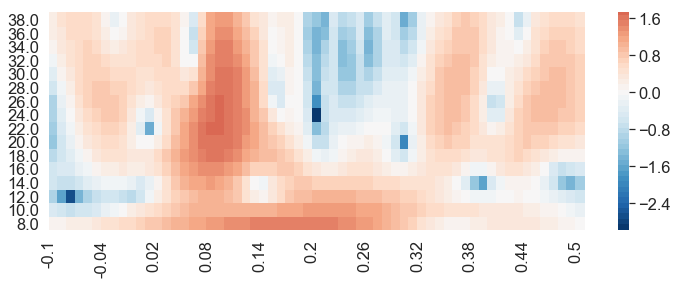

In [4]:
event = 'LV'
data = evokeds[event].data
data = data[:,epochs.ch_names.index('EEG 056')].squeeze()

freqs = evokeds[event].freqs
times = evokeds[event].times

fig, ax = plt.subplots(1,1,figsize=(12,4))
cmap = sns.color_palette('RdBu_r', n_colors=51)
ax = sns.heatmap(data, cmap=cmap, center=0, yticklabels=freqs, ax=ax)
ax.set(xticks=np.arange(0,times.size,6), xticklabels=times[::6].round(2))
ax.invert_yaxis()

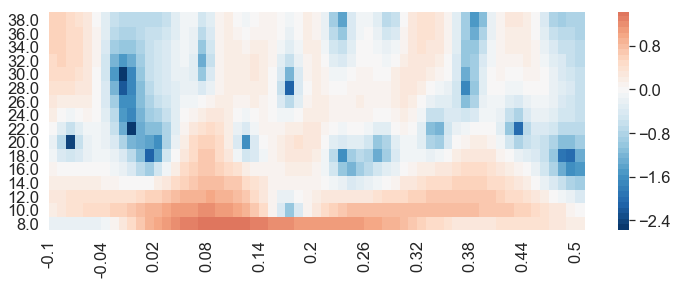

In [5]:
event = 'LA'
data = evokeds[event].data
data = data[:,epochs.ch_names.index('EEG 021')].squeeze()

freqs = evokeds[event].freqs
times = evokeds[event].times

fig, ax = plt.subplots(1,1,figsize=(12,4))
cmap = sns.color_palette('RdBu_r', n_colors=51)
ax = sns.heatmap(data, cmap=cmap, center=0, yticklabels=freqs, ax=ax)
ax.set(xticks=np.arange(0,times.size,6), xticklabels=times[::6].round(2))
ax.invert_yaxis()